Purpose: Extract top predictor genes from single stress random forests.<br>
Author: Anna Pardo<br>
Date initiated: Oct. 23, 2023

In [47]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [48]:
# set the directory
d = "../../data/rf_outputs/single_stressor_RFs/"

In [49]:
# set up a dict to manually alter names of stressors
snames = {"salt":"Salt","drought":"Drought","lownitrogen":"Low_Nitrogen","cold":"Cold","flood":"Flooding","heat":"Heat"}

In [50]:
# pull feature importance files into one big dictionary
fi = {}
for subd in os.listdir(d):
    s = subd.strip().split("_")[0]
    st = snames[s]
    fi[st] = {}
    for ssd in os.listdir(d+subd):
        b = ssd.strip().split("_T")[0]
        for f in os.listdir(d+subd+"/"+ssd):
            if f.endswith("_sorted.tsv"):
                fi[st][b] = pd.read_csv(d+subd+"/"+ssd+"/"+f,sep="\t",header="infer")

In [51]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt

In [77]:
# make a function for making dictionaries of top features
def featdict(stressor):
    indict = fi[stressor]
    outdict = {}
    for k in indict:
        df = indict[k]
        threshold = df.iloc[499,1]
        if threshold>0:
            outdict[k] = df[df["Feature_Importance"]>=threshold]
        elif threshold==0:
            outdict[k] = df[df["Feature_Importance"]>threshold]
    return outdict

In [78]:
# generate dictionary of dictionaries of top 100ish features
top500 = {}
for s in fi.keys():
    top500[s] = featdict(s)

In [79]:
# for each stressor: generate a list of top genes (intersection of top gene sets for all BioProjects for that stressor)
setstop500 = {}
for s in top500.keys():
    setstop500[s] = {}
    for k in top500[s].keys():
        setstop500[s][k] = set(list(top500[s][k]["GeneID"]))

In [80]:
setlists = {}
for s in setstop500.keys():
    setlists[s] = []
    for k in setstop500[s].keys():
        setlists[s].append(setstop500[s][k])

In [81]:
# generate intersection of sets for each stressor
core_per_stressor = {}
for s in setlists.keys():
    core_per_stressor[s] = set.intersection(*setlists[s])

In [82]:
# how many "core genes" are there for each stressor?
for s in core_per_stressor.keys():
    print(s)
    print(len(core_per_stressor[s]))

Salt
1
Low_Nitrogen
0
Drought
8
Cold
8
Flooding
1
Heat
2


In [83]:
# generate list of core top predictors for all stressors
sl = []
for k in core_per_stressor.keys():
    sl.append(core_per_stressor[k])
cgssrf = set.intersection(*sl)

In [84]:
len(cgssrf)

0

In [90]:
from venn import venn

Text(0.5, 1.0, 'Top ~500 Features per BioProject, Salt')

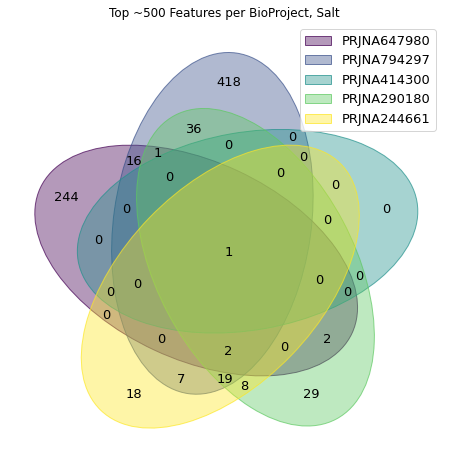

In [93]:
venn(setstop500["Salt"])
plt.title("Top ~500 Features per BioProject, Salt")

In [95]:
setstop500.keys()

dict_keys(['Salt', 'Low_Nitrogen', 'Drought', 'Cold', 'Flooding', 'Heat'])

Text(0.5, 1.0, 'Top ~500 Features per BioProject, Low Nitrogen')

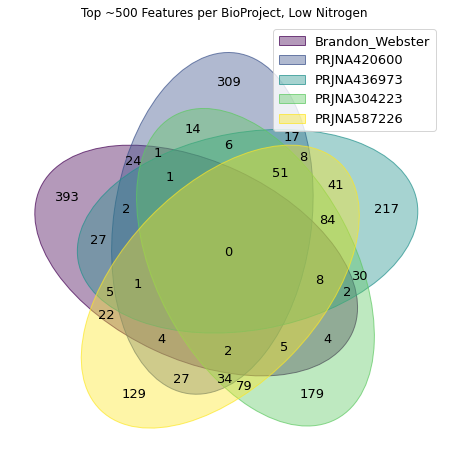

In [100]:
venn(setstop500["Low_Nitrogen"])
plt.title("Top ~500 Features per BioProject, Low Nitrogen")

Text(0.5, 1.0, 'Top ~500 Features per BioProject, Flooding')

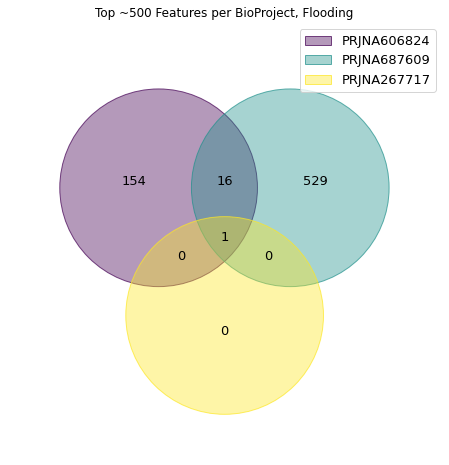

In [101]:
venn(setstop500["Flooding"])
plt.title("Top ~500 Features per BioProject, Flooding")

In [74]:
# Bob, you can ignore all cells from this one to the end of the notebook
# Oct. 24, 2023
# try again: first, make the union of all sets for each stressor, then take the intersection of those unions to get the core set
unions = {}
for s in setlists.keys():
    unions[s] = set.union(*setlists[s])

In [75]:
# make a list and intersect the sets again
sl = []
for k in unions.keys():
    sl.append(unions[k])
cgssrf = set.intersection(*sl)

In [76]:
len(cgssrf)

0

In [29]:
# save a couple files for later use
with open("../../data/coregenes_single_stress_RF.txt","w+") as outfile:
    for i in cgssrf:
        outfile.write(i+"\n")

In [33]:
with open("../../data/coregenes_ssRF_per_stressor.json","w+") as outfile:
    json.dump(core_per_stressor,outfile,indent=4)